### Wczytanie danych i bibliotek

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret

from pycaret.classification import *
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import normalize

In [83]:
dane = pd.read_csv('hotel_bookings.csv')
dane.head()

dane_eda = dane.copy()

In [84]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [85]:
dane.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### EDA

### Wstępne przetworzenie danych

In [86]:
dane.drop(columns=['country', 'company', 'agent', 'reservation_status', 'reservation_status_date', 'arrival_date_year', 'arrival_date_week_number', 'reserved_room_type', 'market_segment'], inplace=True)
dane.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'assigned_room_type',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [90]:
dane.dropna(subset=['children'], inplace=True)

In [91]:
df = pd.get_dummies(dane, drop_first=True)

In [89]:
df.shape
df.head()

,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,1,0,0,2,0.0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,737,1,0,0,2,0.0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,0,7,1,0,1,1,0.0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,0,13,1,0,1,1,0.0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
4,0,14,1,0,2,2,0.0,0,0,0,...,False,False,False,False,False,False,False,False,True,False


### Analiza korelacji

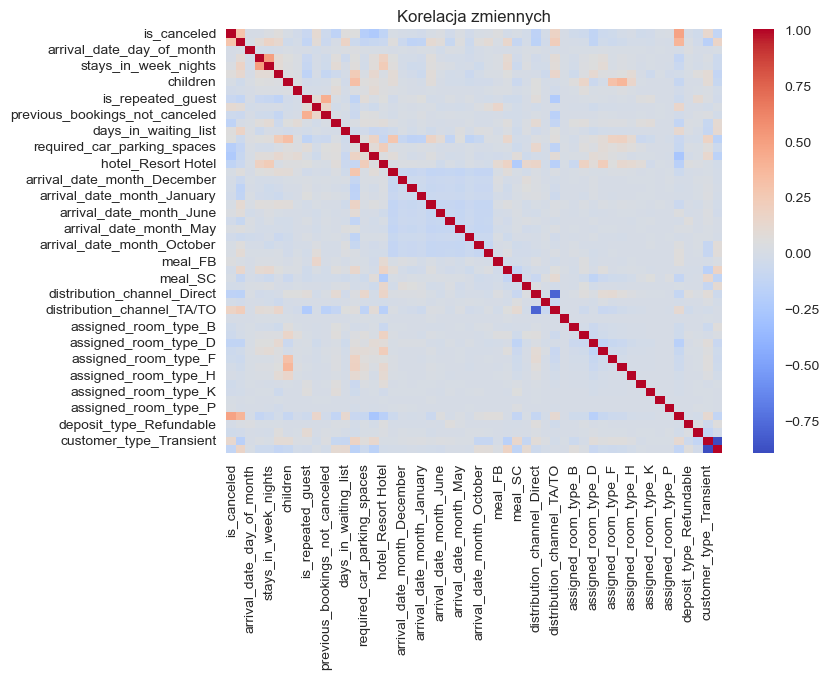

In [44]:
df_corr = df.corr()

w1 = sns.heatmap(df_corr, cmap='coolwarm')
w1.set_title('Korelacja zmiennych')
plt.show()

In [45]:
pd.set_option('display.max_rows', None)
cancel_corr = df.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

deposit_type_Non Refund           0.481488
lead_time                         0.293177
total_of_special_requests         0.234706
required_car_parking_spaces       0.195492
distribution_channel_TA/TO        0.176056
distribution_channel_Direct       0.151609
booking_changes                   0.144371
hotel_Resort Hotel                0.136505
customer_type_Transient           0.133170
assigned_room_type_D              0.128017
customer_type_Transient-Party     0.124231
previous_cancellations            0.110140
is_repeated_guest                 0.084788
assigned_room_type_E              0.064784
adults                            0.059990
previous_bookings_not_canceled    0.057355
days_in_waiting_list              0.054193
assigned_room_type_C              0.053872
adr                               0.047622
assigned_room_type_F              0.045971
assigned_room_type_I              0.040783
meal_FB                           0.038832
customer_type_Group               0.038696
assigned_ro

In [46]:
df_corr


,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
is_canceled,1.000000,0.293177,-0.006084,-0.001783,0.024771,0.059990,0.005048,-0.032488,-0.084788,0.110140,...,-0.002866,-0.040783,-0.032811,0.003773,0.013072,0.481488,-0.011310,-0.038696,0.133170,-0.124231
lead_time,0.293177,1.000000,0.002234,0.085667,0.165799,0.119544,-0.037622,-0.020918,-0.124418,0.086040,...,-0.021101,-0.019328,-0.027952,-0.002817,-0.009759,0.380174,0.016586,-0.031927,-0.174026,0.159622
arrival_date_day_of_month,-0.006084,0.002234,1.000000,-0.016370,-0.028192,-0.001539,0.014544,-0.000233,-0.006152,-0.027015,...,0.003350,0.002445,-0.006219,0.000396,-0.005384,-0.008629,0.032149,-0.001551,-0.000670,0.006339
stays_in_weekend_nights,-0.001783,0.085667,-0.016370,1.000000,0.498967,0.091889,0.045793,0.018483,-0.087242,-0.012775,...,0.008775,-0.001024,0.002988,-0.002688,-0.005967,-0.114279,0.001761,-0.007163,0.019475,-0.064914
stays_in_week_nights,0.024771,0.165799,-0.028192,0.498967,1.000000,0.092983,0.044203,0.020191,-0.097247,-0.013993,...,0.010819,-0.008898,0.002765,-0.002275,-0.008321,-0.080002,0.006791,-0.016182,0.007292,-0.064277
adults,0.059990,0.119544,-0.001539,0.091889,0.092983,1.000000,0.030447,0.018148,-0.146425,-0.006736,...,0.094889,-0.005481,-0.055382,0.000718,-0.032132,-0.028972,0.003247,0.058978,0.091051,-0.115814
children,0.005048,-0.037622,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,...,0.143309,0.006217,-0.006958,-0.000754,-0.002613,-0.096671,-0.006754,-0.006650,0.096135,-0.092846
babies,-0.032488,-0.020918,-0.000233,0.018483,0.020191,0.018148,0.024030,1.000000,-0.008943,-0.007501,...,0.008195,-0.001383,-0.002168,-0.000236,-0.000818,-0.030436,-0.003007,0.000512,0.021591,-0.022921
is_repeated_guest,-0.084788,-0.124418,-0.006152,-0.087242,-0.097247,-0.146425,-0.032859,-0.008943,1.000000,0.082293,...,-0.002304,0.041040,0.055363,-0.000525,-0.001820,-0.058425,-0.001515,0.097976,0.023478,-0.030241
previous_cancellations,0.110140,0.086040,-0.027015,-0.012775,-0.013993,-0.006736,-0.024730,-0.007501,0.082293,1.000000,...,-0.007090,-0.005518,-0.004583,0.003129,-0.001035,0.143313,-0.003803,-0.004187,-0.026532,0.015151


In [47]:
for i in range(len(df_corr)):
    df_corr.iloc[i, i] = 0

largest_abs_values = df_corr.abs().unstack().sort_values(ascending=False).head(50)

print("\n20 największych wartości bezwzględnych:")
print(largest_abs_values.iloc[::2,])


20 największych wartości bezwzględnych:
customer_type_Transient      customer_type_Transient-Party     0.895584
distribution_channel_TA/TO   distribution_channel_Direct       0.797499
stays_in_weekend_nights      stays_in_week_nights              0.498967
deposit_type_Non Refund      is_canceled                       0.481488
is_repeated_guest            previous_bookings_not_canceled    0.418056
lead_time                    deposit_type_Non Refund           0.380174
children                     assigned_room_type_G              0.372458
                             adr                               0.324854
                             assigned_room_type_F              0.305917
lead_time                    is_canceled                       0.293177
arrival_date_month_August    adr                               0.274887
total_of_special_requests    deposit_type_Non Refund           0.268029
                             is_canceled                       0.234706
hotel_Resort Hotel     

### Detekcja anomalii

In [48]:
from pycaret.anomaly import *
exp_ano101 = setup(df, session_id = 123, use_gpu=True)

,Description,Value
0,Session id,123
1,Original data shape,"(119386, 52)"
2,Transformed data shape,"(119386, 52)"
3,Numeric features,16
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,True


In [49]:
iforest = create_model('iforest')
print(iforest)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:20:36
Status,. . . . . . . . . . . . . . . . . .,Fitting 0.05 Fraction
Estimator,. . . . . . . . . . . . . . . . . .,Isolation Forest


KeyboardInterrupt: 

In [ ]:
#svm = create_model('svm', fraction = 0.025)
#print(svm)

In [15]:
iforest_results = assign_model(iforest)
iforest_results.head()

,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,Anomaly,Anomaly_Score
0,0,342,1,0,0,2,0.0,0,0,0,...,False,False,False,False,False,False,True,False,1,0.012845
1,0,737,1,0,0,2,0.0,0,0,0,...,False,False,False,False,False,False,True,False,1,0.024943
2,0,7,1,0,1,1,0.0,0,0,0,...,False,False,False,False,False,False,True,False,0,-0.031925
3,0,13,1,0,1,1,0.0,0,0,0,...,False,False,False,False,False,False,True,False,0,-0.078485
4,0,14,1,0,2,2,0.0,0,0,0,...,False,False,False,False,False,False,True,False,0,-0.096751


In [92]:
df = df[iforest_results['Anomaly'] == 0]

In [93]:
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [99]:
dane_norm = normalize(df.select_dtypes(include=['int64', 'float64']),axis=0)
dane_norm = pd.DataFrame(dane_norm, columns=dane.select_dtypes(include=['int64', 'float64']).columns)
dane_norm.drop(columns='is_canceled', inplace=True)

In [95]:
# Normalizacja kolumnowa (min-max scaling)
dane_norm = df.select_dtypes(include=[np.number]).apply(
    lambda col: (col - col.min()) / (col.max() - col.min())
)

# Usunięcie kolumny 'is_canceled'
dane_norm.drop(columns='is_canceled', inplace=True)

# Obliczenie wariancji dla znormalizowanej kolumny



In [112]:
df[df['children']==0]

,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
4,0,14,1,0,2,2,0.0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
5,0,14,1,0,2,2,0.0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
6,0,0,1,0,2,2,0.0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
8,1,85,1,0,3,2,0.0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
9,1,75,1,0,3,2,0.0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119381,0,188,31,2,3,2,0.0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
119383,0,164,31,2,4,2,0.0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
119384,0,21,30,2,5,2,0.0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
119385,0,23,30,2,5,2,0.0,0,0,0,...,False,False,False,False,False,False,False,False,True,False


In [96]:
dane_norm.var().nsmallest(16)

adr                               0.032023
stays_in_weekend_nights           0.047829
stays_in_week_nights              0.055102
lead_time                         0.055421
arrival_date_day_of_month         0.087443
total_of_special_requests         0.117046
adults                                 NaN
children                               NaN
babies                                 NaN
is_repeated_guest                      NaN
previous_cancellations                 NaN
previous_bookings_not_canceled         NaN
booking_changes                        NaN
days_in_waiting_list                   NaN
required_car_parking_spaces            NaN
dtype: float64

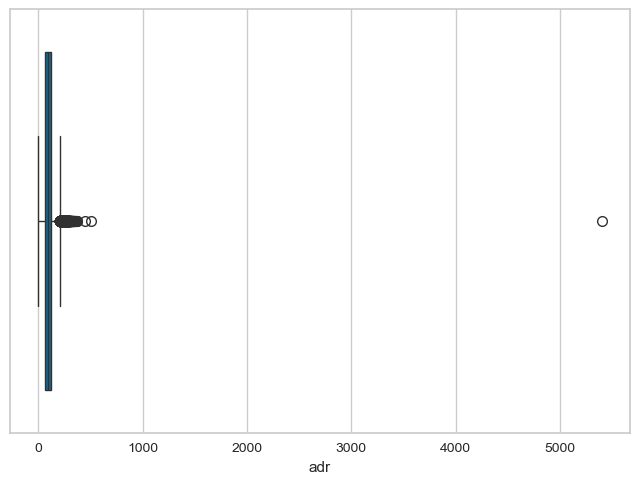

In [73]:
sns.boxplot(x=dff['adr'])
plt.show()